## Problems with this model

The model basically remembers the image.  
The latent space is not small compared to the input space, so the model is not compressing the data.


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras.models as models
import keras.layers as layers
from keras.preprocessing.image import ImageDataGenerator

c:\Users\Andrey\anaconda3\envs\ML\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# load data
data = np.load("../resized_dogs_cats_50.npz")
images = data["images"]

# normalize data
images = images / 255.0

# split data
train_images = images[:20000]
test_images = images[20000:]


In [3]:
# encoder 
input_layer = layers.Input(shape=(50, 50, 3))
x = layers.Conv2D(32, (3, 3), padding='same')(input_layer)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

encoded.shape

TensorShape([None, 13, 13, 32])

In [4]:

# decoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [5]:
autoencoder = models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 32)        9248      
                                                                 
 up_sampling2d (UpSampling2D  (None, 50, 50, 32)       0         
 )                                                           

Epoch 1/10
782/782 [==============================] - 47s 59ms/step - loss: 0.4364
Epoch 2/10
782/782 [==============================] - 48s 62ms/step - loss: 0.4234
Epoch 3/10
782/782 [==============================] - 50s 64ms/step - loss: 0.4220
Epoch 4/10
782/782 [==============================] - 47s 61ms/step - loss: 0.4213
Epoch 5/10
782/782 [==============================] - 47s 60ms/step - loss: 0.4209
Epoch 6/10
782/782 [==============================] - 47s 61ms/step - loss: 0.4205
Epoch 7/10
782/782 [==============================] - 49s 62ms/step - loss: 0.4205
Epoch 8/10
782/782 [==============================] - 47s 60ms/step - loss: 0.4203
Epoch 9/10
782/782 [==============================] - 47s 60ms/step - loss: 0.4201
Epoch 10/10
782/782 [==============================] - 8s 10ms/step


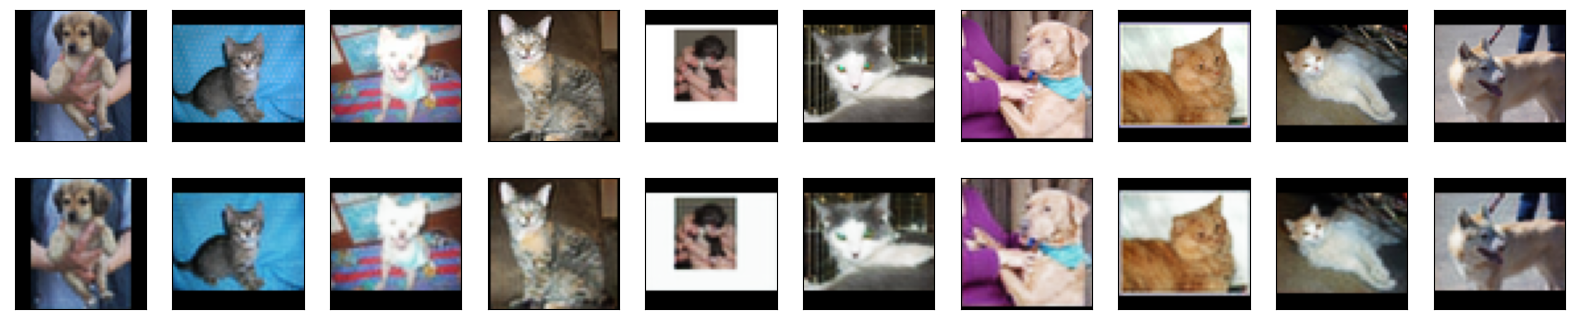

In [6]:
# autoencoder
autoencoder = models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# image modifier
# datagen = ImageDataGenerator(
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest')
# datagen.flow(images, images, batch_size=64)

# train
with tf.device('/device:GPU:0'):
    autoencoder.fit(images, images, epochs=10, batch_size=32, shuffle=True)
# test
decoded_imgs = autoencoder.predict(images)

# plot
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)